In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

+ Download dữ liệu CIFAR10 sau đó chia thành 2 tập dữ liệu train và validation.
+ Chuẩn hóa dữ liệu với mean = 0.5 và std = 0.5

In [ ]:
# Define the transformation with normalization
transform = transforms.Compose([
    transforms.ToTensor(),  # chuyển đổi ảnh từ định dạng PIL hoặc NumPy thành một tensor có giá trị nằm trong khoảng [0, 1].
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
])

# Download the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Split the training set into training and validation sets
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
trainset, valset = torch.utils.data.random_split(trainset, [train_size, val_size])

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Check if everything is set up correctly
print(f'Train size: {len(trainset)}, Validation size: {len(valset)}, Test size: {len(testset)}')

Files already downloaded and verified
Files already downloaded and verified


+ Hiển thị 5 ảnh đầu tiên trong tập dữ liệu testing

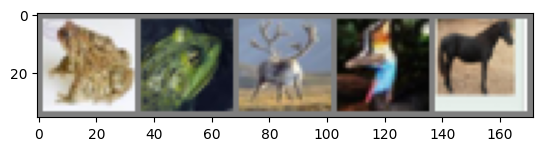

In [3]:
def imshow(img):
    img = img * 0.5 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    imshow(torchvision.utils.make_grid(images[:5]))
    break

+ Xây dựng model MLP cơ bản để train tập dữ liệu CIFAR10

In [4]:
def getModel(n_features):
    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(n_features, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    ).to(device)
    return model

+ Khởi tạo hàm loss function và phương thức optimizer

In [5]:
n_features = 28 * 28 # Đối với ảnh trong tập FashionMNIST thì size ảnh là 28x28 => Số lượng feature trong ảnh là 28 * 28 = 784
model = getModel(n_features)
lr = 0.01
optim = SGD(params = model.parameters(), lr = lr)
loss_fn = nn.CrossEntropyLoss()
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

+ Xây dựng hàm đánh giá model

In [6]:
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy


+ Bắt đầu training và đánh giá model.

In [7]:
n_epochs = 10
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    running_loss = 0.0
    running_correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        
        inputs, labels = inputs.to(device), labels.to(device)

        optim.zero_grad() # khởi tạo giá trị đạo hàm = 0


        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()


        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()

        # 2 dòng dưới đây là lan truyền ngược và optimizer tham số w và b.
        loss.backward()
        optim.step()        

    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, loss_fn)
    print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1024x3072 and 784x256)

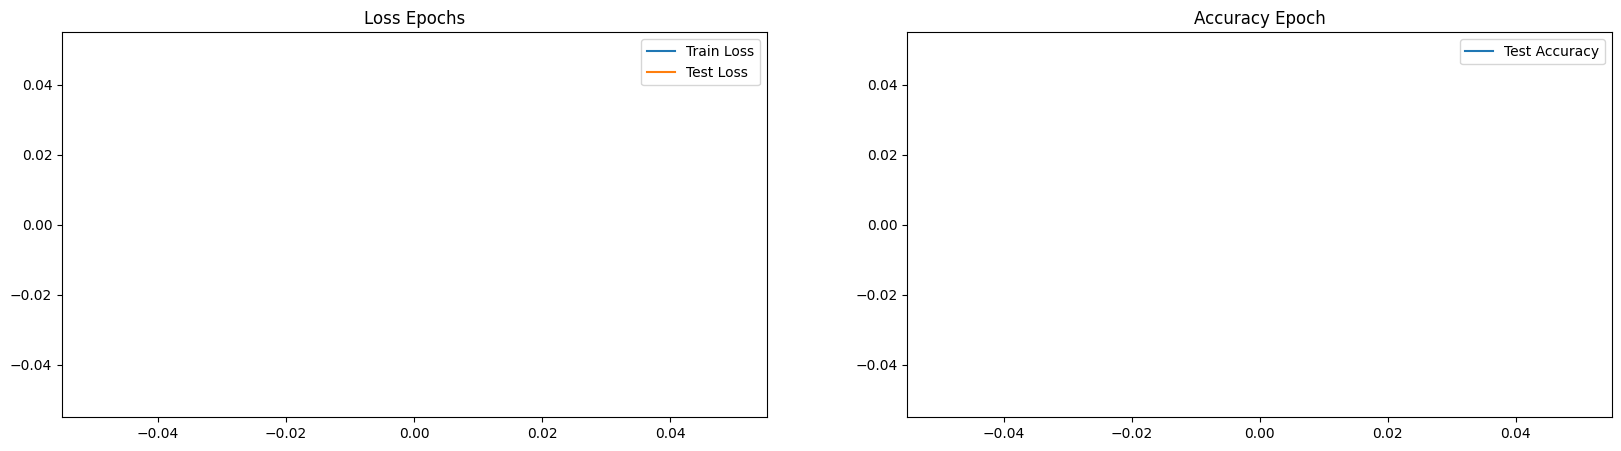

In [ ]:
plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.title('Loss Epochs')
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy Epoch')
plt.plot(test_accuracies, label = 'Test Accuracy')
plt.legend()

+ Dưới đây là bài tập về code from scratch

In [ ]:

def zScoreScaling(tensor):

    mean = torch.mean(tensor)
    std = torch.std(tensor)
    return (tensor - mean) / std

In [ ]:
def minMaxScaling(tensor):

    min_val = torch.min(tensor)
    max_val = torch.max(tensor)
    return (tensor - min_val) / (max_val - min_val)

In [ ]:
class Linear:
 import torch

class Linear:
    def __init__(self, in_features, out_features):
        self.weight = torch.randn(out_features, in_features)
        self.bias = torch.randn(out_features)

    def forward(self, x):
        return torch.matmul(x, self.weight.T) + self.bias

# Tạo một đối tượng của lớp Linear
linear = Linear(3, 2)  # 3 đặc trưng đầu vào, 2 đặc trưng đầu ra

# Tạo tensor đầu vào
tensor = torch.tensor([1.0, 2.0, 3.0])

# Thực hiện phép biến đổi tuyến tính
output = linear.forward(tensor)

# In kết quả
print(output)
print(f"Weight = {linear.weight}")
print(f"Bias = {linear.bias}")
    

tensor([ 4.5917, -1.7988])
Weight = tensor([[ 3.0398, -0.3257,  0.3254],
        [ 0.5768,  0.2888, -1.3601]])
Bias = tensor([1.2272, 1.1270])


In [ ]:
tensor = torch.tensor([
    [1.0, 2.0, 3.0], 
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0]
])
zscore = zScoreScaling(tensor)
min_max = minMaxScaling(tensor)
print(zscore)
print(min_max)


tensor([[-1.4606, -1.0954, -0.7303],
        [-0.3651,  0.0000,  0.3651],
        [ 0.7303,  1.0954,  1.4606]])
tensor([[0.0000, 0.1250, 0.2500],
        [0.3750, 0.5000, 0.6250],
        [0.7500, 0.8750, 1.0000]])


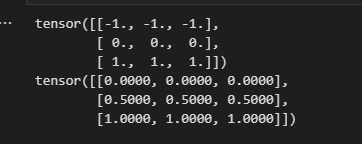

In [ ]:
tensor = torch.tensor([1.0, 2.0, 3.0])
linear = Linear(3, 2)
out = linear.forward(tensor)
print(out)
print(f"Weight = {linear.weight}")
print(f"Bias = {linear.bias}")

tensor([-0.1514, -0.3943])
Weight = tensor([[ 0.2817, -0.3317,  0.2253],
        [-0.4910, -0.2942,  0.3367]])
Bias = tensor([-0.4457, -0.3249])
